Data Description:

The dataset consists of three columns and 100 rows which includes two feature columns and one label column.
Features columns are in the form of float and continuous values ranges from [-1.801737 to 3.108743] and [0.568025 to 3.892678] and the means are at [0.930868 and 1.855540].
Whereas label is in the form discreate numerical float values that inclueds [0.0 and 1.o]. 50% of the data consists of 0 and rest consists of 1 as labels.
There are zero duplicates and no null values consists in the dataset.
Pattern that is formed by the input features is linear separatering. That means a liner line is separating 0 label and 1 label.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv(r'C:\Users\chauh\Downloads\4.linearsep.csv',header=None)

In [3]:
data.head()

,0,1,2
0,-0.177497,0.930496,1.0
1,1.977424,1.766155,0.0
2,1.800024,1.700343,0.0
3,-0.770837,2.359163,1.0
4,-0.308009,1.594063,1.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       100 non-null    float64
 1   1       100 non-null    float64
 2   2       100 non-null    float64
dtypes: float64(3)
memory usage: 2.5 KB


In [5]:
data.duplicated().sum()

0

In [6]:
data.isna().sum()

0    0
1    0
2    0
dtype: int64

In [7]:
data[2].value_counts()

1.0    50
0.0    50
Name: 2, dtype: int64

In [8]:
data.describe()

,0,1,2
count,100.000000,100.000000,100.000000
mean,0.930868,1.855540,0.500000
std,1.248367,0.713457,0.502519
min,-1.801737,0.568025,0.000000
25%,-0.143369,1.296152,0.000000
50%,1.171946,1.806731,0.500000
75%,1.881075,2.249652,1.000000
max,3.108743,3.892678,1.000000


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data[[0,1]],data[2],test_size=0.2,random_state=42)

In [10]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_trains = scale.fit_transform(X_train)
X_tests = scale.transform(X_test)

In [11]:
import tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout,BatchNormalization
from keras.callbacks import EarlyStopping


In [ ]:
call = EarlyStopping()

In [16]:
model = Sequential()
model.add(Dense(6,activation="relu",input_dim=2))
model.add(BatchNormalization())
model.add(Dense(5,activation="relu"))
model.add(BatchNormalization())
model.add(Dense(4,activation="relu"))
model.add(BatchNormalization())
model.add(Dense(3,activation="relu"))
model.add(BatchNormalization())
model.add(Dense(2,activation="relu"))
model.add(BatchNormalization())
model.add(Dense(1,activation="sigmoid"))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 18        
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dense_2 (Dense)             (None, 5)                 35        
                                                                 
 dense_3 (Dense)             (None, 4)                 24        
                                                                 
 dense_4 (Dense)             (None, 3)                 15        
                                                                 
 dense_5 (Dense)             (None, 2)                 8         
                                                                 
 dense_6 (Dense)             (None, 1)                 3

In [18]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [19]:
history = model.fit(X_trains,y_train,epochs=50,batch_size=12,validation_split=0.2,callbacks=call)

Epoch 1/50
6/6 [==============================] - 2s 80ms/step - loss: 0.6852 - accuracy: 0.4844 - val_loss: 0.6945 - val_accuracy: 0.3125
Epoch 2/50
6/6 [==============================] - 0s 11ms/step - loss: 0.6807 - accuracy: 0.5312 - val_loss: 0.6938 - val_accuracy: 0.3125
Epoch 3/50
6/6 [==============================] - 0s 11ms/step - loss: 0.6755 - accuracy: 0.5312 - val_loss: 0.6933 - val_accuracy: 0.3125
Epoch 4/50
6/6 [==============================] - 0s 11ms/step - loss: 0.6696 - accuracy: 0.5312 - val_loss: 0.6911 - val_accuracy: 0.3125
Epoch 5/50
6/6 [==============================] - 0s 12ms/step - loss: 0.6626 - accuracy: 0.5312 - val_loss: 0.6882 - val_accuracy: 0.3125
Epoch 6/50
6/6 [==============================] - 0s 11ms/step - loss: 0.6557 - accuracy: 0.5312 - val_loss: 0.6858 - val_accuracy: 0.3125
Epoch 7/50
6/6 [==============================] - 0s 11ms/step - loss: 0.6476 - accuracy: 0.5312 - val_loss: 0.6830 - val_accuracy: 0.3125
Epoch 8/50
6/6 [===========

In [20]:
from mlxtend.plotting import plot_decision_regions as pt

33750/33750 [==============================] - 43s 1ms/step


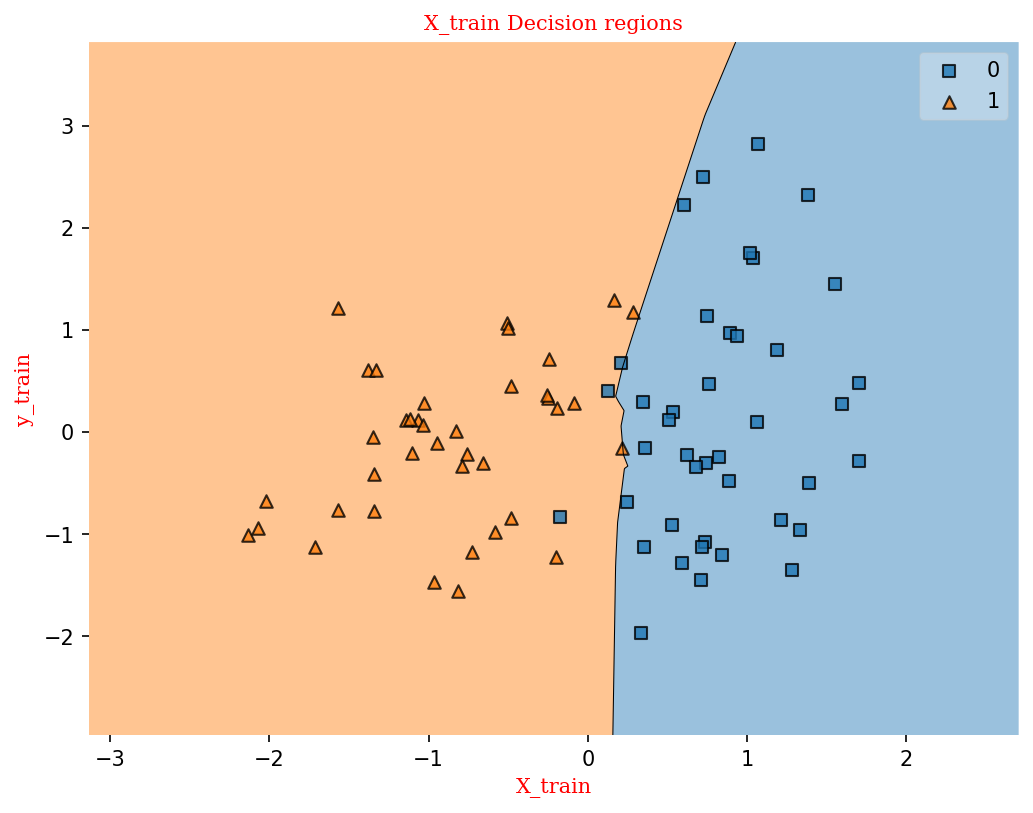

In [21]:
plt.figure(figsize=(8,6),dpi=150)
pt(X_trains,y_train.values.astype(int),clf=model)
plt.title("X_train Decision regions",color='red',fontsize='medium',fontfamily='serif')
plt.xlabel("X_train",color='red',fontsize='medium',fontfamily='serif')
plt.ylabel("y_train",color='red',fontsize='medium',fontfamily='serif')
plt.show()

In [22]:
y_pred = model.predict(X_tests)

1/1 [==============================] - 0s 102ms/step


In [25]:
y_predf = np.array([1 if x>0.5 else 0 for x in y_pred])

33750/33750 [==============================] - 43s 1ms/step


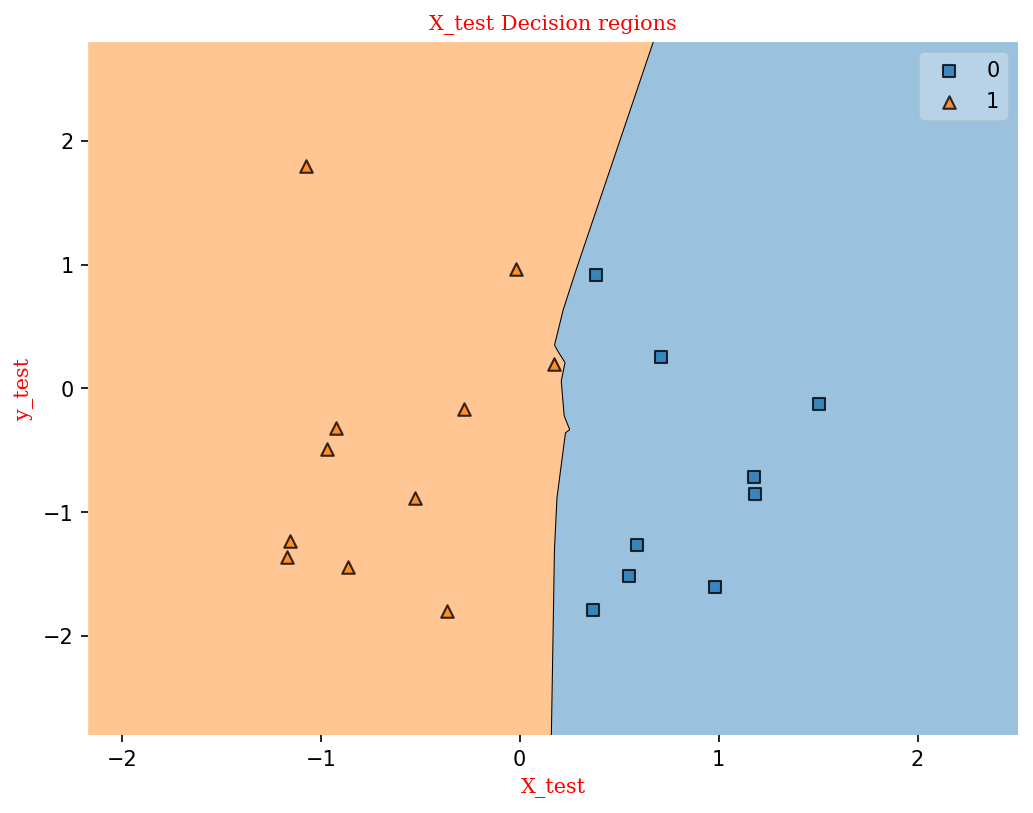

In [24]:
plt.figure(figsize=(8,6),dpi=150)
pt(X_tests,y_predf.astype(int),clf=model)
plt.title("X_test Decision regions",color='red',fontsize='medium',fontfamily='serif')
plt.xlabel("X_test",color='red',fontsize='medium',fontfamily='serif')
plt.ylabel("y_test",color='red',fontsize='medium',fontfamily='serif')
plt.show()

In [27]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predf)

0.9